# Final Project

### Angelica Ramos, Jorge Alejandro Morataya, Natalie Jensen, Roni Merrill, Tony Wu

# Introduction and Background

San Diego continues to be a popular torusit destination with a record number of 35 million people visiting San Diego in 2016. The Major League Baseball team, many beaches, and great weather will continue to attract people to the downtown San Diego area well into the future. With the high volume of people flocking to this area for various reasons throguhout the year there is a high demand for parking along the Downtown streets. Parking meters are located along most of the downtown streets and are used everyday by hundredes of people. Depending on where the meter is located determines the amount of use it recives. 

There is an obvious lack of parking in San Diego in general, but it is especially bad in in areas concentrated around  popular busniesses like Downtown. San Diego has reciently made strides in making these parking spots more avaliable to the modern human with the introduction of meters that accept credit and debit cards, but there is still a parking problem due to the high volume of people in the area. Based on the most popular parking meteres in we would like to determine the most conjusted business areas that need impovment. The revenue made off of the parking meters in those sepecific areas could be used to aliviate some of the parking issues in a variety of ways. 

In an analysis of parking utilization in the city of Annapolis, researches sought to find a soultion to the parking probelm in Annapolis. The parking issue in San Diego is very similiar to that of Annapolis, becasue parking concern may "result in driver frustration, contribute to traffic congestion, illegal parking actions affecting public safety...as motorists are searching for parking". The difference between the two cities is their size, with San Diego catering to 35 times the amount of Annapolis' population. 

Based on what zones made the most money off of parking transactions in the San Diego Downtown area, relative to the businesses in the area, how can we make the businesses with a high concentration of parking more accessible to a higher volume of people, therefore reducing the parking problem? 

We hypothize that the most used parking meters will be a good measure of how busy an area is. We can use this information along with where popular businesses are located to determine where change should be made. 

References:

- 1) http://www.sandiegouniontribune.com/news/sdut-san-diego-parking-meter-upgrade-credit-card-2014jun10-story.html San Diego Modernizing Parking Meters 
- 2) http://www.sandiegouniontribune.com/business/tourism/sd-fi-tourism-record-20170217-story.html San Diego Attracted Record Number of Visitors in 2016
- 3) https://annapolisparking.com/wp-content/uploads/2017/02/parking-utilization-feb2017.pdf City of Annapolis Parking Utilization Ananlysis 





In [1]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Number of decimal places to round latitude / longitude
num_decimal_places = 2

C:\Users\twu12\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Description 

- Parking Meter Transactions 

Link: https://data.sandiego.gov/datasets/parking-meters-transactions/

Description: All transactions for all parking meters icluding the date, pole id, the transaction amount, the payment method and the amount of time spent at the meter per transaction. There are a total of 55,527 observations in this dataset.

- Parking Meter Locations 

Link: https://data.sandiego.gov/datasets/parking-meters-transactions/

Description: Location of parking meters with corresponding parking zones and area. It inclused the city area, sub area, pole id, longitude and latitude. There are a total of 4,932 observations in this dataset. 

- Active Businesses in San Diego 

Link: https://data.sandiego.gov/datasets/business-listings/

Description: Businesses in San Diego that are active according to the City Treasurer’s business tax information.It includes the address, business owner, many other useless parameters and the longitude and latitude. There are a total of 75,453 observations in this dataset.

# Privacy and Ethics of our data:
In the business data set, we will be removing columns that may pertain to personal information of the businesses such as the business owner's name, business phone number, and business address. However, we are keeping the zip code of the businesses as it is clear that we are analyzing data in San Diego and it does not infringe on the privacy of any particular individuals.

In [2]:
#load parking meter location csv file into dataframe 
df_loc = pd.read_csv('data/treas_parking_meters_loc_datasd.csv').dropna()
df_loc

,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155
3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107
4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987
5,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1017,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145540,32.699985
6,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1019,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145545,32.699981
7,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1103,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699544
8,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1105,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699545
9,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1107,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.146065,32.699490


In [3]:
#load parking meter transactions csv file into dataframe
df_trans = pd.read_csv('data/treas_meters_2016_pole_by_month_datasd.csv').dropna()
#df_trans

In [4]:
#load active business in san diego csv file into dataframe 
df_biz = pd.read_csv('data/sd_active_businesses_datasd.csv')
#df_biz

# Data Cleaning/ Pre-Processing

For location of parking meters we only want to consider zone, area, pole id, longitude, and latitiude. We drop all other parameters.

In [5]:
df_loc = df_loc.drop(['sub_area','config_id','config_name'], axis=1)
#df_loc

For parking meter transactions we only want to consider pole id, and transaction amount. We drop all other parameters. including num trans

In [6]:
df_trans = df_trans.drop(['meter_type','month',], axis=1)
#df_trans

For the active businesses we only consider the date of creation, latitude, longitude, and zip. All other parameters are dropped.

In [7]:
df_biz = df_biz.drop(['account_key','address_str','apt_suite','bus_start_dt','business_owner_name','business_phone',
                        'city','doing_bus_as_name','expiration_dt','naics_code','naics_description','ownership_type',
                        'pmb_box','po_box','state','BID'], axis=1)
#df_biz

Renames 'lat' and 'lon' columns to 'latitude' and 'longitutde' to make it consist with other data set.

In [8]:
df_biz.columns = ['creation_dt', 'latitude', 'longitude', 'zip']
#df_biz

In [9]:
# Loop through creation date column to take out businesses registered in 2017

for index, row in enumerate(df_biz['creation_dt']):

    seventeen = '2017'
    
    if seventeen in row:
        df_biz = df_biz.drop(index)
df_biz = df_biz.reset_index().drop(['index'], axis=1)

In [10]:
# rename pole_id to pole in df_trans

df_trans.columns = ['pole', 'sum_trans', 'num_trans']

# Combine df_loc and df_trans at the pole I.D.

df_meter = pd.merge(df_trans, df_loc, on = 'pole')
df_meter

,pole,sum_trans,num_trans,zone,area,longitude,latitude
0,1-1004,18701,182,Downtown,Core - Columbia,-117.163929,32.715904
1,1-1004,16869,193,Downtown,Core - Columbia,-117.163929,32.715904
2,1-1004,19283,198,Downtown,Core - Columbia,-117.163929,32.715904
3,1-1004,17912,185,Downtown,Core - Columbia,-117.163929,32.715904
4,1-1004,19425,244,Downtown,Core - Columbia,-117.163929,32.715904
5,1-1004,16745,214,Downtown,Core - Columbia,-117.163929,32.715904
6,1-1004,17722,197,Downtown,Core - Columbia,-117.163929,32.715904
7,1-1004,22814,242,Downtown,Core - Columbia,-117.163929,32.715904
8,1-1004,19609,212,Downtown,Core - Columbia,-117.163929,32.715904
9,1-1004,21145,234,Downtown,Core - Columbia,-117.163929,32.715904


In [11]:
df_meter = df_meter[(df_meter['latitude'] > 32) &
                    (df_meter['latitude'] < 33) &
                    (df_meter['longitude'] > -117.200) &
                    (df_meter['longitude'] < - 117.100)]
dfmin = df_meter.min()
dfmin

pole               1-1004
sum_trans               5
num_trans               1
zone                 City
area         Bankers Hill
longitude        -117.187
latitude          32.6929
dtype: object

In [12]:
# Condense earnings data to display earnings per pole, per year
df_earnings = pd.DataFrame(df_meter.groupby(['pole', 'area', 'longitude', 'latitude']).sum_trans.sum())


In [13]:
df_biz = df_biz[(df_biz['latitude'] > 32) &
                    (df_biz['latitude'] < 33) &
                    (df_biz['longitude'] > -117.200) &
                    (df_biz['longitude'] < - 117.100)]
dfmin = df_biz.min()
dfmin

creation_dt    1974-07-01
latitude          32.5685
longitude          -117.2
zip                     0
dtype: object

In [14]:
# Change zip codes to 5 digit integers
def zipcode(z):
    return int(z[:5])
df_biz['zip'] = df_biz['zip'].apply(zipcode)

# Limit zip codes to San Diego zip codes
df_biz = df_biz[(df_biz['zip'] > 91900) &
                   (df_biz['zip'] < 92200)]


In [15]:
# Each classified zone's zip codes

downtown_zips = [92101]
uptown_zips = [92103]
midcity_zips = [92102, 92104, 92116]
city_zips = [92110, 92113]

# Add a classified zone to business dataframe. If the business is in a zone outside of Downtown, Uptown, Mid-city, and City, classify it as 'Other'
def biz_zone(zip_code):
    if zip_code in downtown_zips:
        return 'Downtown'
    elif zip_code in uptown_zips:
        return 'Uptown'
    elif zip_code in midcity_zips:
        return 'Mid-City'
    elif zip_code in city_zips:
        return 'City'
    else:
        return 'Other'
df_biz['zone'] = df_biz['zip'].apply(biz_zone)


In [16]:
# Now we can see and match what businesses have parking meters
print('Parking meter zones: ', list(df_meter['zone'].unique()))
print('Business zones: ', list(df_biz['zone'].unique()))

Parking meter zones:  ['Downtown', 'Uptown', 'Mid-City', 'City']
Business zones:  ['Other', 'City', 'Downtown', 'Mid-City', 'Uptown']


# Data Visualization

...

The following visualization shows where the parking meters are and their coorisponding transactions in the Downtown San Diego area. Visually seeing this will help when comparing parking meter transaction to popular businesses. 

Text(0,0.5,'Latitude')

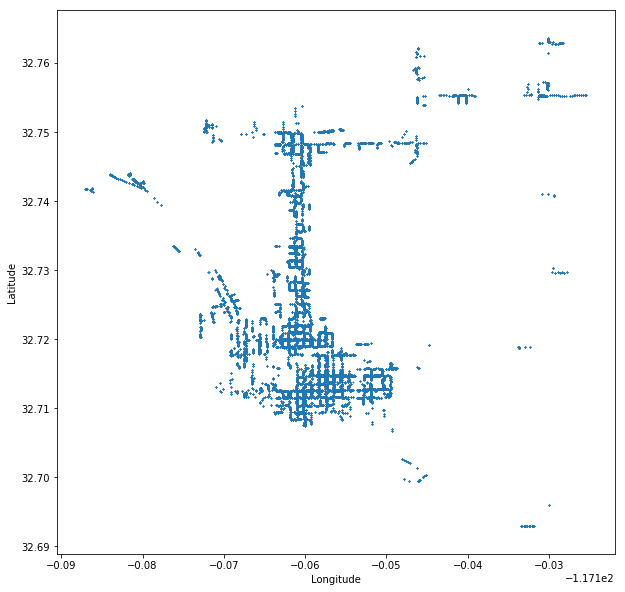

In [17]:
plt.figure(figsize=(10, 10))
x = df_meter['longitude']
y = df_meter['latitude']
plt.scatter(x, y, s=.20)

axes = plt.gca()
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')



Text(0,0.5,'Latitude')

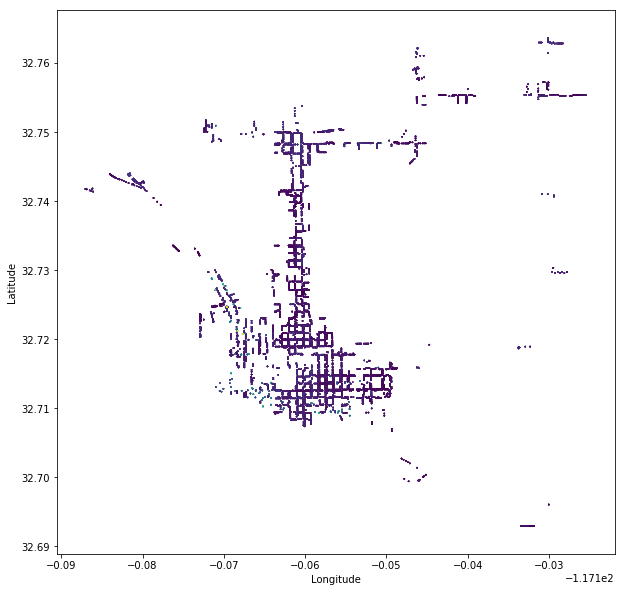

In [18]:
# Scatter plot of parking meter locations

plt.figure(figsize=(10, 10))
x = df_meter['longitude']
y = df_meter['latitude']
plt.scatter(x, y, s=.20, c = df_meter['num_trans'])

axes = plt.gca()
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')


This visualization is much more broad then the previous one, instead of focusing on just Downtown San Diego it shows all the businesses in San Diego. To properly see what businesses correspond to popular meters a heat map is used to see where increased activity is. 

Text(0,0.5,'Latitude')

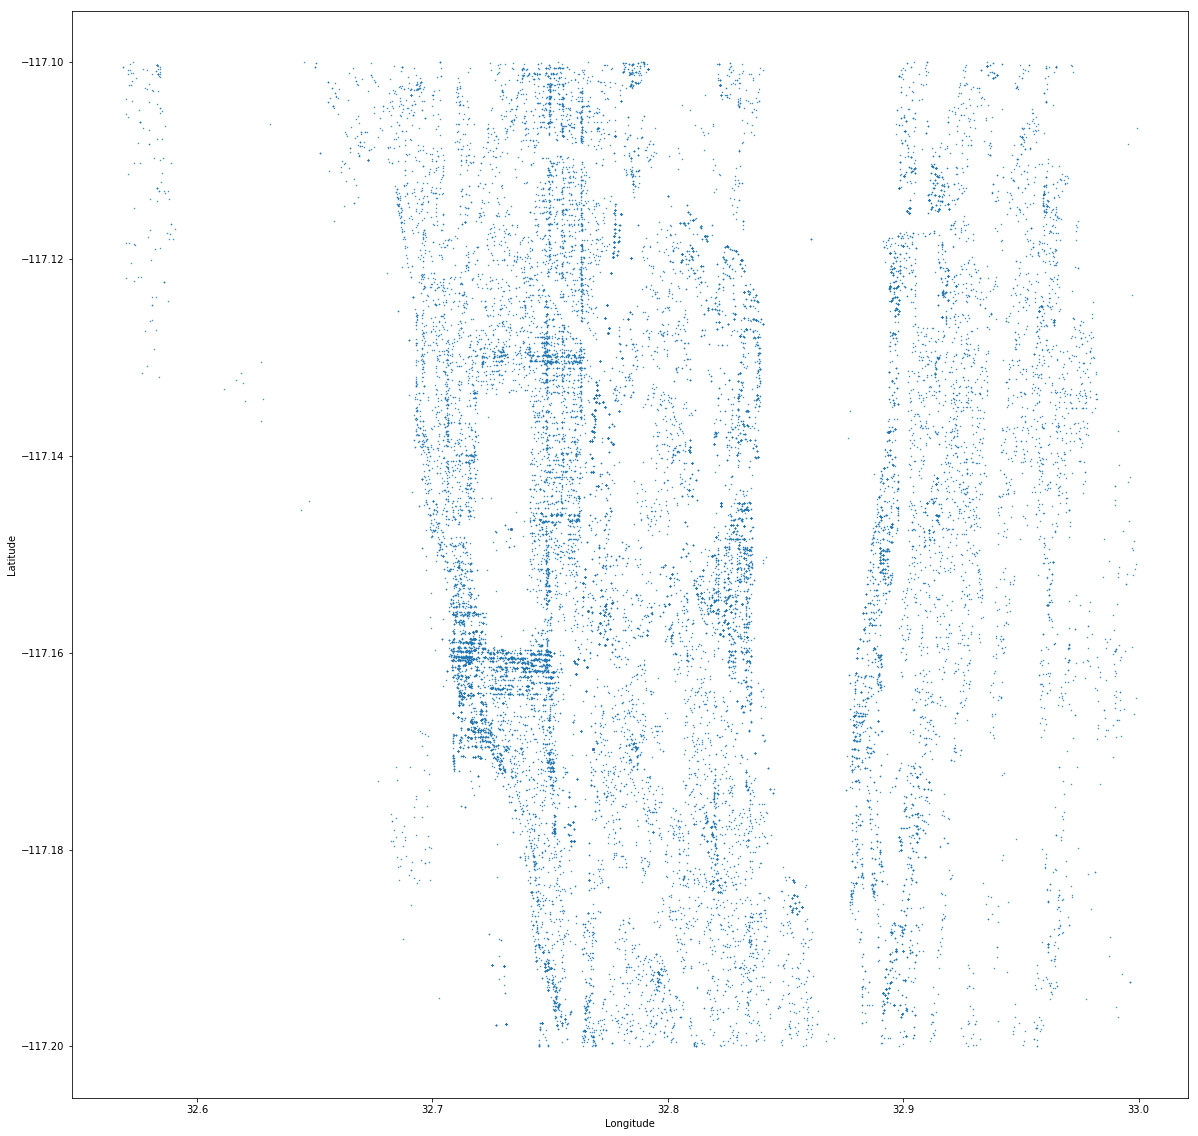

In [19]:
#scatter plot of local businesses in the area

plt.figure(figsize=(20, 20))
plt.scatter(df_biz['latitude'], df_biz['longitude'], s=.20)

bizzy = plt.gca()
bizzy.set_xlabel('Longitude')
bizzy.set_ylabel('Latitude')

Text(0,0.5,'Latitude')

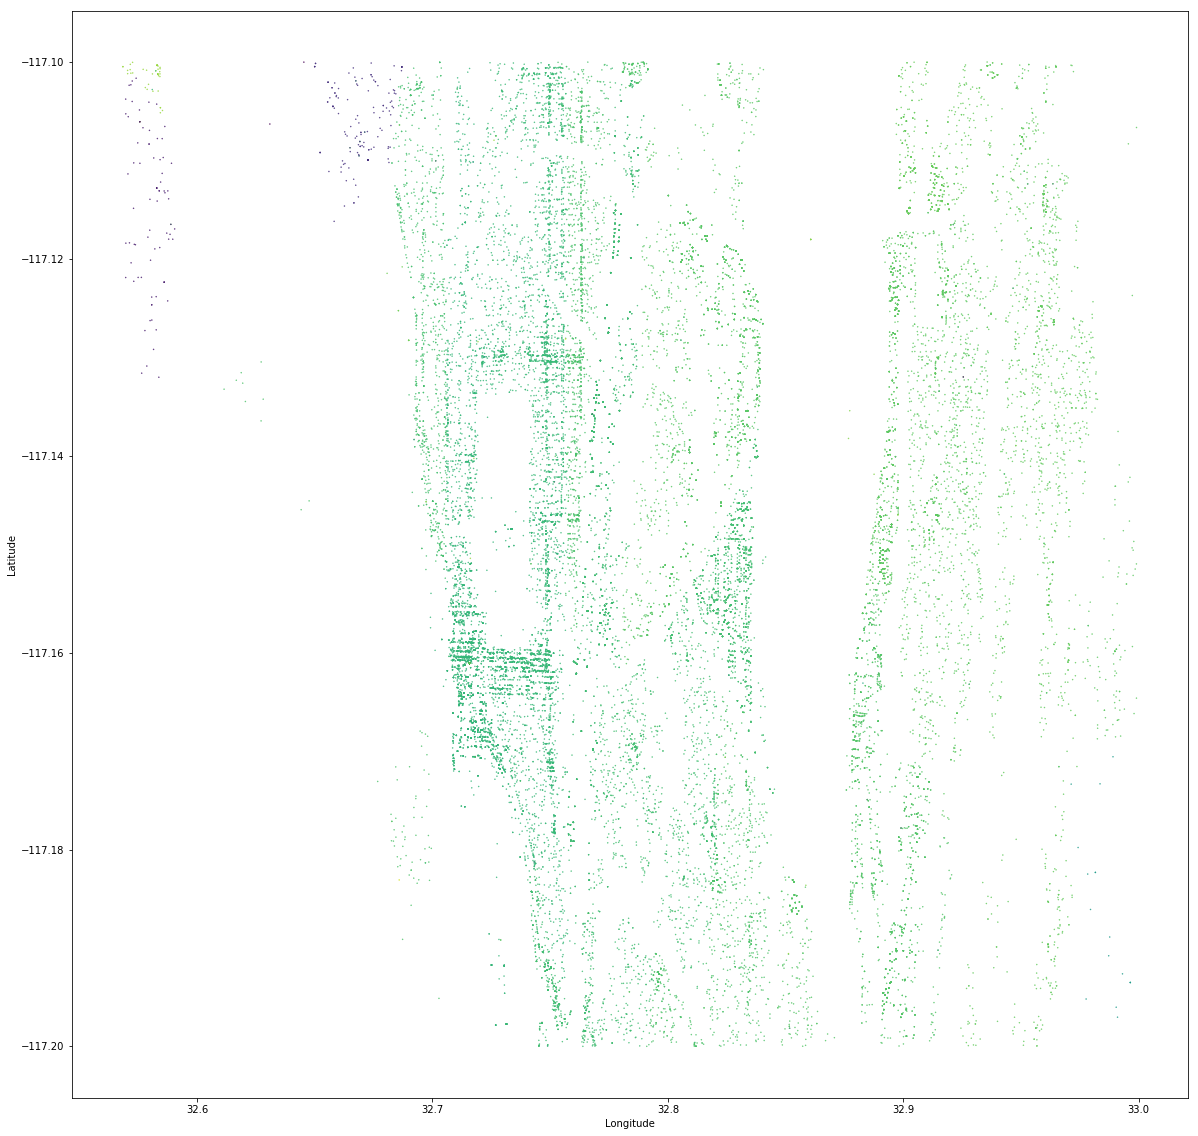

In [20]:

plt.figure(figsize=(20, 20))
plt.scatter(df_biz['latitude'], df_biz['longitude'], s=.20, c = df_biz['zip'])

bizzy = plt.gca()
bizzy.set_xlabel('Longitude')
bizzy.set_ylabel('Latitude')

This shows the most popular meters in Downtown San diego.

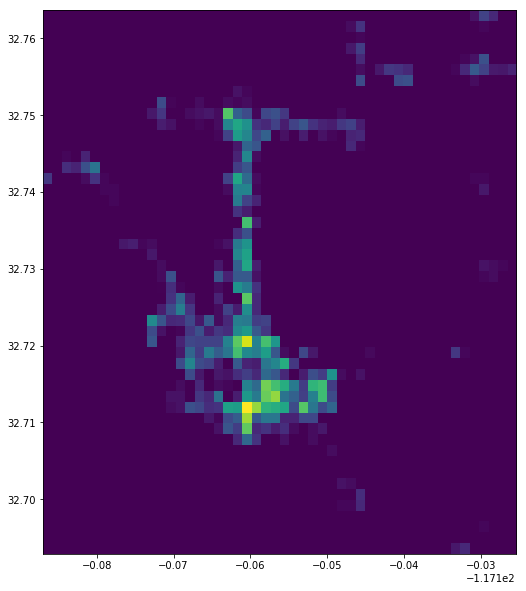

In [21]:
#Heatmap of parking meters. More meters = more heat.
plt.figure(figsize=(10, 10))
x = df_meter['longitude']
y = df_meter['latitude']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

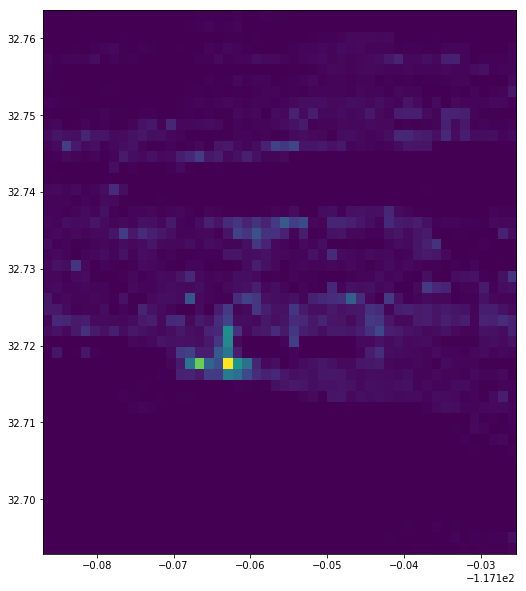

In [22]:
#Heatmap of businesses. more businesses = more heat.
plt.figure(figsize=(10, 10))
x = df_biz['longitude']
y = df_biz['latitude']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [23]:
# Total parking meter earnings, by area
df_area_earnings = pd.DataFrame(df_meter.groupby('area').sum_trans.sum())

# Total earnings for all meters across San Diego
sd_total_parking_income = df_area_earnings.sum_trans.sum()
print("Total yearly earnings from parking meters is $", sd_total_parking_income , "dollars.")
df_area_earnings


Total yearly earnings from parking meters is $ 998005191 dollars.


,sum_trans
area,
Bankers Hill,86680003
Barrio Logan,2968642
Core - Columbia,105389715
Cortez Hill,43630332
East Village,195901437
Five Points,13435316
Gaslamp,100202497
Golden Hill,1798362
Hillcrest,134572802


In [24]:
# Total number of pole by area

df_num_pole = pd.DataFrame(df_loc['area'].value_counts())

df_num_pole

,area
East Village,1062
Bankers Hill,660
Hillcrest,641
Core - Columbia,522
Little Italy,367
Gaslamp,352
Cortez Hill,301
Spares,263
Marina,250
North Park,116


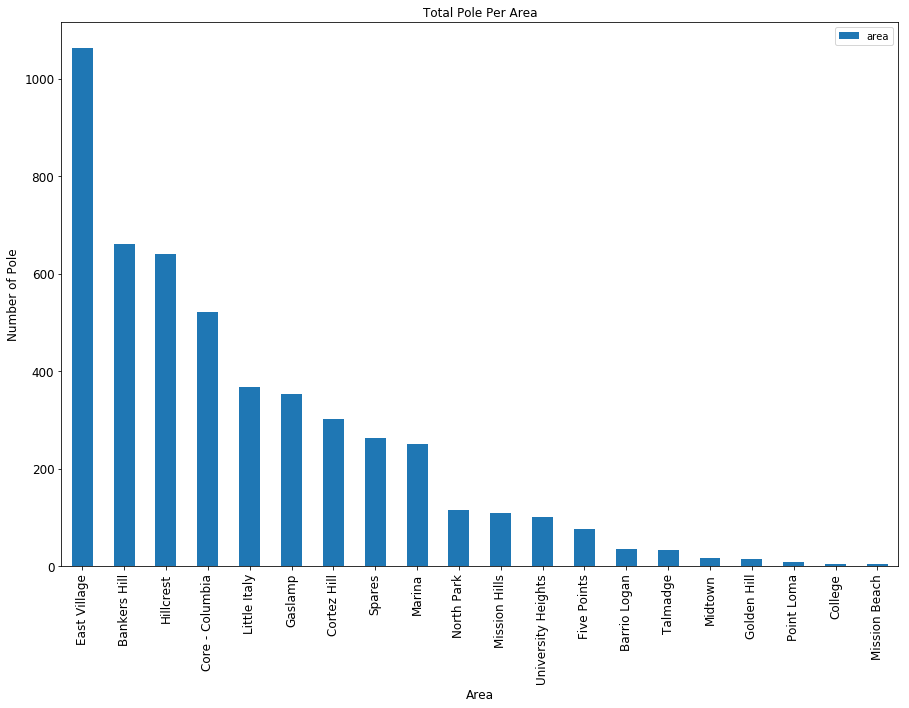

In [25]:
ax = df_num_pole.plot(kind='bar', title ="Total Pole Per Area", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Area", fontsize=12)
ax.set_ylabel("Number of Pole", fontsize=12)
plt.show()

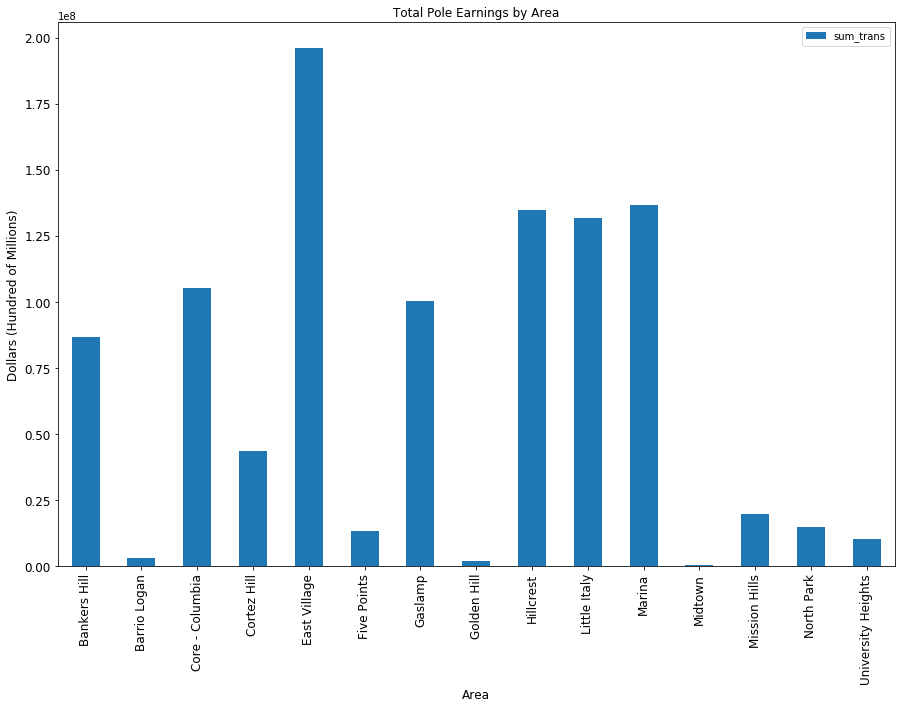

In [26]:
# Plot total pole earnings by area
ax = df_area_earnings['sum_trans'].plot(kind='bar', title ="Total Pole Earnings by Area", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Area", fontsize=12)
ax.set_ylabel("Dollars (Hundred of Millions)", fontsize=12)
plt.show()

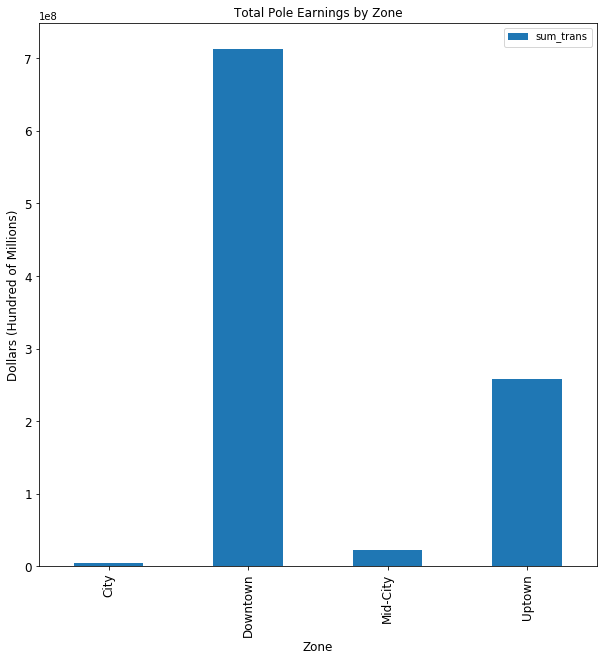

In [27]:
# Total parking meter earnings, by zone
df_zone_earnings = pd.DataFrame(df_meter.groupby('zone').sum_trans.sum())

# Plot total pole earnings by zone
ax = df_zone_earnings['sum_trans'].plot(kind='bar', title ="Total Pole Earnings by Zone", figsize=(10, 10), legend=True, fontsize=12)
ax.set_xlabel("Zone", fontsize=12)
ax.set_ylabel("Dollars (Hundred of Millions)", fontsize=12)
plt.show()


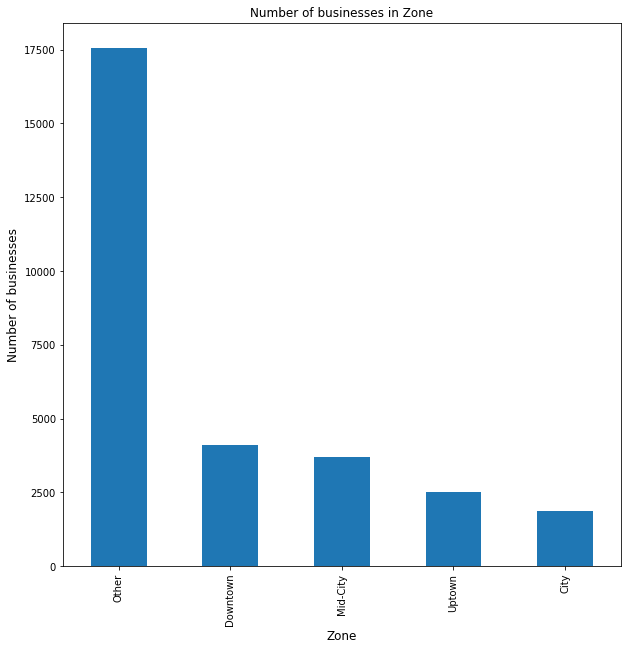

Total number of businesses:  29701
Number of businesses in zones without parking meters:  17538


In [28]:
# Plot of number of businesses in a zone
ax = df_biz['zone'].value_counts().plot(kind='bar', title="Number of businesses in Zone",figsize=(10,10))
ax.set_xlabel("Zone", fontsize=12)
ax.set_ylabel("Number of businesses", fontsize=12)
plt.show()
print('Total number of businesses: ', len(df_biz))
print('Number of businesses in zones without parking meters: ', len(df_biz.loc[df_biz['zone'] == 'Other']))

# Data Analysis

In [29]:
meter_trans_dt = df_meter[df_meter['zone'] == 'Downtown']['sum_trans'].values
meter_trans_mc = df_meter[df_meter['zone'] == 'Mid-City']['sum_trans'].values
meter_trans_c = df_meter[df_meter['zone'] == 'City']['sum_trans'].values
meter_trans_ut = df_meter[df_meter['zone'] == 'Uptown']['sum_trans'].values

print("Mean Downtown meter income: ", np.mean(meter_trans_dt))
print("Mean Mid-City meter income: ", np.mean(meter_trans_mc))
print("Mean City meter income: ", np.mean(meter_trans_c))
print("Mean Uptown meter income: ", np.mean(meter_trans_ut))

Mean Downtown meter income:  21274.2804103
Mean Mid-City meter income:  9246.3674148
Mean City meter income:  6096.86944444
Mean Uptown meter income:  14580.8082292


In [30]:
dt_mc_t_val, dt_mc_p_val = ttest_ind(meter_trans_dt, meter_trans_mc)
dt_c_t_val, dt_c_p_val = ttest_ind(meter_trans_dt, meter_trans_c)
dt_ut_t_val, dt_ut_p_val = ttest_ind(meter_trans_dt, meter_trans_ut)
print('p-value between Downtown and Mid-City: ', dt_mc_p_val)
print('p-value between Downtown and City: ', dt_c_p_val)
print('p-value between Downtown and Uptown: ', dt_ut_p_val)

p-value between Downtown and Mid-City:  1.53940771934e-81
p-value between Downtown and City:  5.70149878256e-40
p-value between Downtown and Uptown:  5.92821678467e-176


Here, we can see that there is, indeed, a significant difference in amount of money made from parking meters in different zones, using a t-test. The average amount of income made from each zone varies by a large margin, so we can conclude that there is some factor that affects the amount of transactions a parking meter makes, based on its location.

In [31]:
# Amount of money made from parking meter to number of businesses ratios

num_dt_biz = len(df_biz[df_biz['zone'] == 'Downtown'])
num_mc_biz = len(df_biz[df_biz['zone'] == 'Mid-City'])
num_c_biz = len(df_biz[df_biz['zone'] == 'City'])
num_ut_biz = len(df_biz[df_biz['zone'] == 'Uptown'])

dt_meter_biz_ratio = sum(meter_trans_dt) / num_dt_biz
mc_meter_biz_ratio = sum(meter_trans_mc) / num_dt_biz
c_meter_biz_ratio = sum(meter_trans_c) / num_dt_biz
ut_meter_biz_ratio = sum(meter_trans_ut) / num_dt_biz

print('Downtown parking meters transaction sum to number of businesses ratio: ', dt_meter_biz_ratio)
print('Mid-City parking meters transaction sum to number of businesses ratio: ', mc_meter_biz_ratio)
print('City parking meters transaction sum to number of businesses ratio: ', c_meter_biz_ratio)
print('Uptown parking meters transaction sum to number of businesses ratio: ', ut_meter_biz_ratio)

Downtown parking meters transaction sum to number of businesses ratio:  174423.091687
Mid-City parking meters transaction sum to number of businesses ratio:  5439.30562347
City parking meters transaction sum to number of businesses ratio:  1073.28753056
Uptown parking meters transaction sum to number of businesses ratio:  63075.3643032


We can see that the amount of money made by parking meters to the number of businesses varies vastly by region. Although we do not know directly the cause of the amount of money a parking meter makes, we can note that there is a low correlation between the number of businesses in a zone and the amount of money a parking meter makes in a zone, since the number of businesses each zone with parking meters are relatively similar, based on the figure above.

# Conclusions / Discussion

For this project we were trying to answer the question "What area makes the most money off of parking transactions", and then compare that to the number of buisness in the area. We were then going to use this comparison to see if there was a need, or opportunity, for more meters in certain locations. However, what we didn't realize when we intially came up with this idea, was that the city owned parking meters are mostly concentrated Downtown and along the 8 near Downtown. Private lots that are run by companies like ACE account for paid parking in other areas like PB and La Jolla, however since this is privately owned, it was not in our dataset. The areas that the City of San Diego has meters in are only a fraction of San Diego. Therefore, we can only compare meter transactions and buisnesses in a fraction of San Diego.
   
What we found with the data we used was that Downtown makes the most money off parking transactions. Specifically for the year 2016 that area made more than 700,000,000 dollars with East Village being the highest earner of 195,901,437 dollars. Now, comparing this to the number of buisnesses in each area, Downtown only has around 15% of the total number of buisnesses in all of San Diego. Where the majority of the buisnesses are located falls in the "Other" category, which constitutes as everything outside the other four categories. This includes areas like Scripps Ranch, Pacific Beach, La Jolla, Del Mar, Miaramar, Kearny Mesa, etc.
     
With this in mind, this dataset wasn't the best to use to look at what we were trying to answer. However, using the data we did, we've shown that Downtown makes by far the most off parking meter transactions. In our scatterplot, you can see an outline of the streets Downtown - parking meters are lined down a majority of the blocks. From our heatmap, you can that certain blocks are more popular than others. While we would recommend more meters Downtown, based off this information, they already cover most of the busy streets, so it wouldn't be viable idea to suggest more when there's not really anywhere to put them. There are a lot of privately owned lots Downtown as well, which are available for when all the meters are taken up. 
     
With regards to future analyses, it would be interesting to take into account the private parking lots as well, and look at the volume of transactions those get. That would give us a better look at parking across San Deigo. From this we would be better able to analyze if there would be an opportunity for more lots, parking structures, or meters. 
     
Lastly, in 2016 the City of San Diego's annual budget was $3.3 billion (https://www.sandiego.gov/fm/annual/fy16). Subtracting the maitenence of 9 million dollars from the earnings of the parking meters, meter transactions alone make up for 29.989% of this budget. No where in this budget, does it say where this money is specifically going. Something that would be interesting to investigate further would be what this money is used for. Is it going into a general budget pool? Or is it going to a specific department like transportation? Is this money factored into taxes the city imposes on the residents, or is it considered "extra" money? Without analyzing data like this, we would not be able to ask these type of important questions. 